In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
import numpy as np
import socket
import requests
import time
import select

%config InlinBackend.figure_format = 'svg'

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.











In [5]:
def recvall(sock, count):
    buf = b''
    while count:
        newbuf = sock.recv(count)
        if not newbuf: return None
        buf += newbuf
        count -= len(newbuf)
    return buf

def activate(sock, sount):
    buf = b''
    while count:
        newbuf = sock.recv(count)
        if not newbuf: return None
        buf += newbuf
        count -= len(newbuf)
    return buf

HOST='155.230.28.207'
PORT=8488

In [3]:
options = {
    'model' : 'cfg/yolo-obj.cfg',
    'load' : 'bin/yolo-obj.weights',
    'threshod' : 0.1,
    'gpu' : 0.7
}

tfnet = TFNet(options)

Parsing ./cfg/yolo-obj.cfg
Parsing cfg/yolo-obj.cfg
Loading bin/yolo-obj.weights ...
Successfully identified 268242956 bytes
Finished in 0.018210649490356445s

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)

 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky 

In [6]:
s=socket.socket(socket.AF_INET,socket.SOCK_STREAM)
print('Socket created')

s.bind((HOST,PORT))
print('Socket bind complete')

s.listen()
print('Socket now listening')

input_list = [s]

Socket created
Socket bind complete
Socket now listening


('155.230.28.207', 50104) is connected


/home/ryotta205/anaconda3/envs/YOLOdark/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  app.launch_new_instance()


{'label': 'smoking', 'confidence': 0.8924155, 'topleft': {'x': 454, 'y': 161}, 'bottomright': {'x': 590, 'y': 367}}
{'label': 'smoking', 'confidence': 0.8924155, 'topleft': {'x': 454, 'y': 161}, 'bottomright': {'x': 590, 'y': 367}}
{'label': 'smoking', 'confidence': 0.8924155, 'topleft': {'x': 454, 'y': 161}, 'bottomright': {'x': 590, 'y': 367}}
{'label': 'smoking', 'confidence': 0.8924155, 'topleft': {'x': 454, 'y': 161}, 'bottomright': {'x': 590, 'y': 367}}
{'label': 'smoking', 'confidence': 0.8924155, 'topleft': {'x': 454, 'y': 161}, 'bottomright': {'x': 590, 'y': 367}}
{'label': 'smoking', 'confidence': 0.8924155, 'topleft': {'x': 454, 'y': 161}, 'bottomright': {'x': 590, 'y': 367}}
{'label': 'smoking', 'confidence': 0.8924155, 'topleft': {'x': 454, 'y': 161}, 'bottomright': {'x': 590, 'y': 367}}
{'label': 'smoking', 'confidence': 0.8924155, 'topleft': {'x': 454, 'y': 161}, 'bottomright': {'x': 590, 'y': 367}}
{'label': 'smoking', 'confidence': 0.8924155, 'topleft': {'x': 454, 'y':

KeyboardInterrupt: 

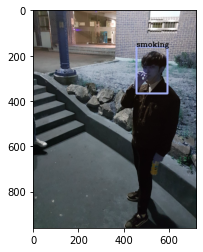

In [7]:
while True:
    input_ready, write_ready, except_ready = select.select(input_list, input_list, [])
 
    for ir in input_ready:
        if ir == s:
            conn, addr = s.accept()
            print(addr, 'is connected', flush=True)
            input_list.append(conn)

    for wr in write_ready:
        wr.send("activate".encode('utf-8'))
        
        length = recvall(wr, 16)
        stringData = recvall(wr, int(length))
        
        data = np.fromstring(stringData, dtype = 'uint8')

        frame = cv2.imdecode(data, cv2.IMREAD_COLOR)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame)
        #img = cv2.imread('fire.jpg', cv2.IMREAD_COLOR)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = frame
        #img = cv2.imread("test.jpg")

        results = tfnet.return_predict(img)

        #img.shape
        #plt.imshow(img)
        
        colors = [tuple(255*np.random.rand(3)) for _ in range(10)]
        for color, result in zip(colors, results) :
            if result['confidence'] >= 0.1 : 
                t1 = (result['topleft']['x'], result['topleft']['y'])
                br = (result['bottomright']['x'], result['bottomright']['y'])
                label = result['label']
                print(result)
        #r = requests.post('http://155.230.28.207:3000/camera_insert',data={'id':"0", 'time':'2020-04-03-14:23', 'cnt':'1'})
        #print(r.text)
        
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.rectangle(img, t1, br, color, 7)
            img = cv2.putText(img, label, t1, cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2)
    
        plt.imshow(img)
        
                